In [13]:
from dateutil import parser
import pandas as pd
import ephem
from math import degrees
from SZA import calculate_SZA_from_datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("calval_final_50_by_column.csv")[["time_UTC", "lat", "lon"]]
df

,time_UTC,lat,lon
0,2/22/20 16:51,42.5393,-72.1779
1,4/20/20 11:54,42.5393,-72.1779
2,5/3/20 12:53,42.5393,-72.1779
3,5/24/20 22:33,42.5393,-72.1779
4,6/18/20 18:47,42.5393,-72.1779
...,...,...,...
281,8/11/20 23:08,39.0404,-95.1921
282,6/14/21 21:57,39.0404,-95.1921
283,6/23/21 11:33,39.0404,-95.1921
284,6/23/21 18:03,39.0404,-95.1921


In [4]:
calculate_SZA_from_datetime?

Signature:
calculate_SZA_from_datetime(
    time_UTC: datetime.datetime,
    lat: float,
    lon: float,
)
Docstring:
Calculates the solar zenith angle (SZA) in degrees based on the given UTC time, latitude, and longitude.

Args:
    time_UTC (datetime.datetime): The UTC time to calculate the SZA for.
    lat (float): The latitude in degrees.
    lon (float): The longitude in degrees.

Returns:
    float: The calculated solar zenith angle in degrees.
File:      ~/Projects/ET-Sensitivity/SZA/SZA.py
Type:      function

In [7]:
SZA1 = df.apply(lambda row: calculate_SZA_from_datetime(parser.parse(str(row.time_UTC)), float(row.lat), float(row.lon)), axis=1)

In [8]:
SZA1

0      53.023589
1      70.207044
2      56.680104
3      73.301462
4      31.041686
         ...    
281    66.468217
282    48.133125
283    84.074454
284    16.038256
285    82.998235
Length: 286, dtype: float64

In [11]:
def calculate_solar_zenith_angle(datetime_UTC, lat, lon):
    observer = ephem.Observer()
    observer.lat = str(lat)
    observer.lon = str(lon)
    observer.date = datetime_UTC

    sun = ephem.Sun(observer)
    solar_zenith_angle = 90 - degrees(sun.alt)

    return solar_zenith_angle

In [12]:
SZA2 = df.apply(lambda row: calculate_solar_zenith_angle(parser.parse(str(row.time_UTC)), float(row.lat), float(row.lon)), axis=1)
SZA2

0      52.796168
1      69.826626
2      55.970563
3      73.684217
4      30.823979
         ...    
281    65.639307
282    47.997219
283    84.352520
284    16.195339
285    82.837322
Length: 286, dtype: float64

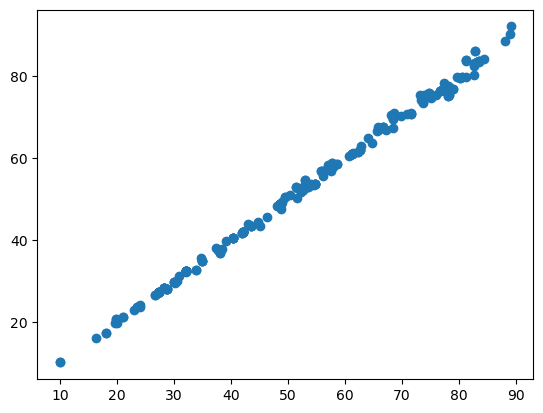

In [14]:
plt.scatter(x=SZA2, y=SZA1)